In [1]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import typhon.arts.xml as axml
import typhon as ty
from copy import deepcopy
%matplotlib inline
ty.plots.styles.use()

In [2]:
abslookup_nolm_aer = axml.load('nolm_aer/abs_lookup.xml')
print(abslookup_nolm_aer.speciestags)
abslookup_nolm_aer_36 = axml.load('nolm_aer_36/abs_lookup.xml')
print(abslookup_nolm_aer_36.speciestags)
abslookup_nolm_aer_arts = axml.load('nolm_aer_arts/abs_lookup.xml')
print(abslookup_nolm_aer_arts.speciestags)
abslookup_nolm_hitran = axml.load('nolm_hitran/abs_lookup.xml')
print(abslookup_nolm_hitran.speciestags)
abslookup_lm_aer = axml.load('lm_aer/abs_lookup.xml')
print(abslookup_lm_aer.speciestags)
abslookup_lm_aer_36 = axml.load('lm_aer_36/abs_lookup.xml')
print(abslookup_lm_aer_36.speciestags)

abslookup_lm = abslookup_lm_aer
abslookup_nolm = abslookup_nolm_aer

[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-CIArotCKDMT252-*-*', 'N2-CIAfunCKDMT252-*-*'], ['O3-*-*-*'], ['O2-*-*-*', 'O2-CIAfunCKDMT100-*-*'], ['CO2-*-*-*', 'CO2-CKDMT252-*-*']]
[['H2O-*-*-*', 'H2O-SelfContCKDMT252-*-*', 'H2O-ForeignContCKDMT252-*-*'], ['N2-*-*-*', 'N2-

In [3]:
co2_lm = abslookup_lm.absorptioncrosssection[0, 3]
co2_nolm = abslookup_nolm.absorptioncrosssection[0, 3]

In [4]:
abslookup_diff = deepcopy(abslookup_nolm_aer)
abslookup_diff.absorptioncrosssection = np.abs(
    abslookup_nolm_aer.absorptioncrosssection - abslookup_nolm_hitran.absorptioncrosssection)
print(np.min(abslookup_diff.absorptioncrosssection))
print(np.max(abslookup_diff.absorptioncrosssection))

0.0
5.098653585115826e-22


CO2 cross sections with line mixing
--

149


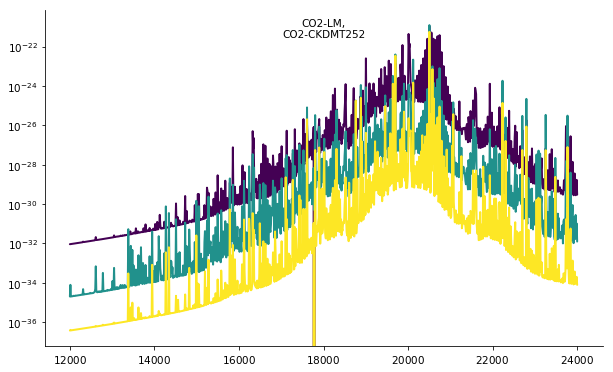

In [5]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_lm, [40, 100, 140], species=[
                                      ['CO2-LM-*-*-*', 'CO2-CKDMT252-*-*']])
print(len(abslookup_lm.pressuregrid))

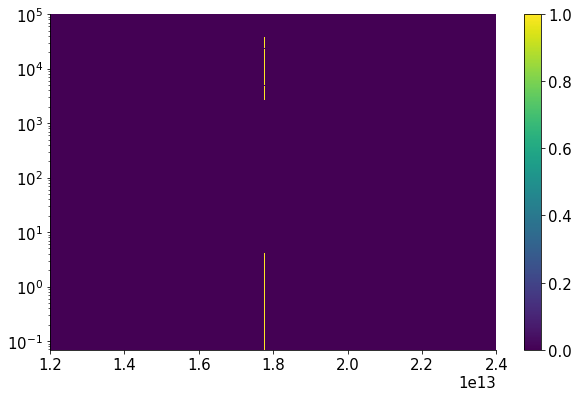

In [6]:
al = deepcopy(abslookup_lm)
#al.absorptioncrosssection[al.absorptioncrosssection < 0] = np.nan
#a = abslookup_lm.absorptioncrosssection < 0
plt.pcolormesh(abslookup_lm.frequencygrid, abslookup_lm.pressuregrid,
               (al.absorptioncrosssection[0,4].T < 0).astype('int'))
               #np.log10(np.abs(al.absorptioncrosssection[0,4].T)))
plt.yscale('log')
#plt.xlim([17e12, 18e12])
plt.colorbar()

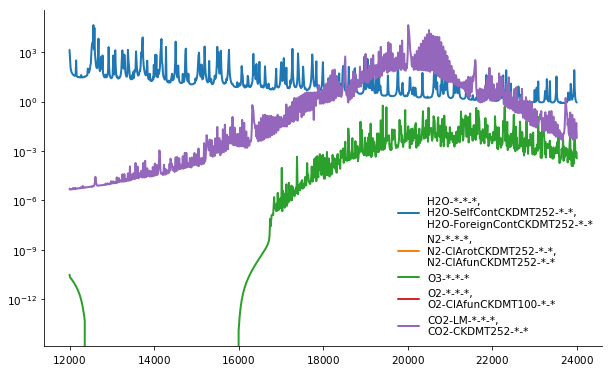

In [7]:
opacity = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_lm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_lm, opacity)

CO2 cross sections without line mixing
--

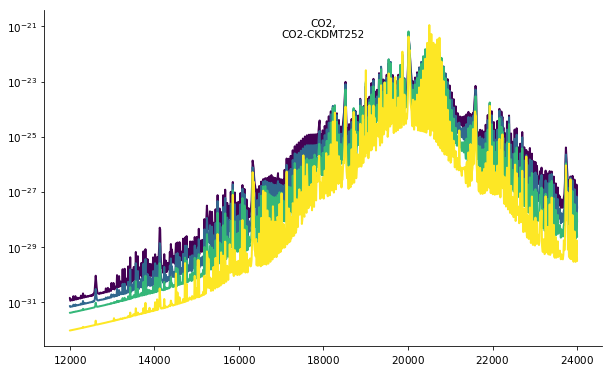

In [8]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_nolm, [0, 10, 20, 40], species=[
                                      ['CO2-*-*-*', 'CO2-CKDMT252-*-*']])

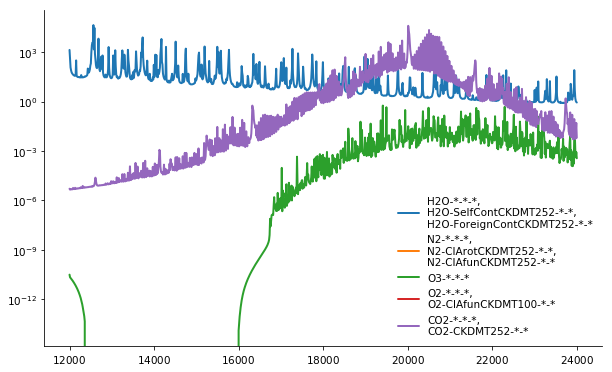

In [9]:
opacity = ty.plots.arts_lookup.calc_opacity_from_lookup(abslookup_nolm)
ty.plots.arts_lookup.plot_lookup_opacity(abslookup_nolm, opacity)

Read y vectors
--

In [10]:
y_lm = axml.load('lm_aer/y.xml')
y_lm_36 = axml.load('lm_aer_36/y.xml')
y_nolm_aer = axml.load('nolm_aer/y.xml')
y_nolm_aer_36 = axml.load('nolm_aer_36/y.xml')
y_nolm_aer_arts = axml.load('nolm_aer_arts/y.xml')
y_nolm_hitran = axml.load('nolm_hitran/y.xml')
f = abslookup_nolm.frequencygrid

AER 3.2 vs. AER 3.6
--

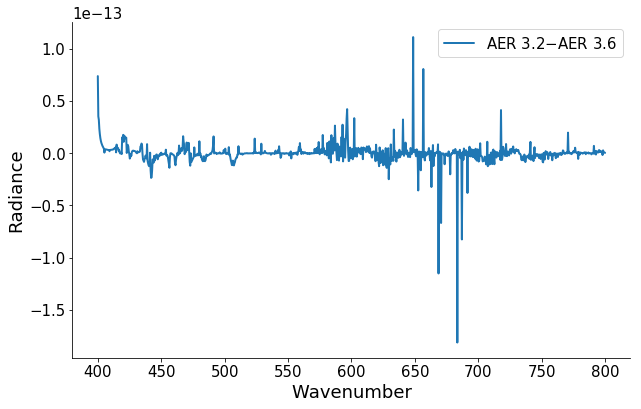

In [11]:
plt.plot(f/3e10, y_nolm_aer - y_nolm_aer_36, label='AER 3.2$-$AER 3.6')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

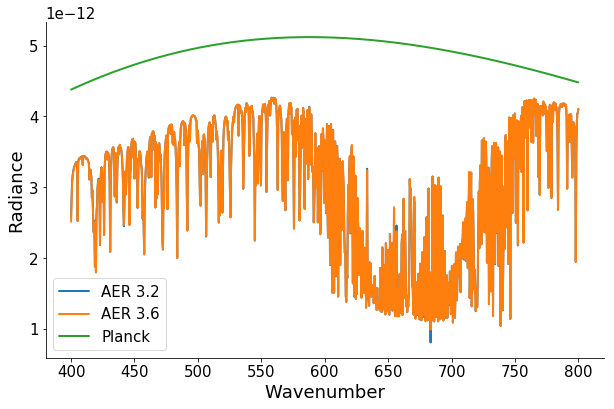

In [12]:
plt.plot(f/3e10, y_nolm_aer, label='AER 3.2')
plt.plot(f/3e10, y_nolm_aer_36, label='AER 3.6')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

AER vs. AER ARTSCAT
--

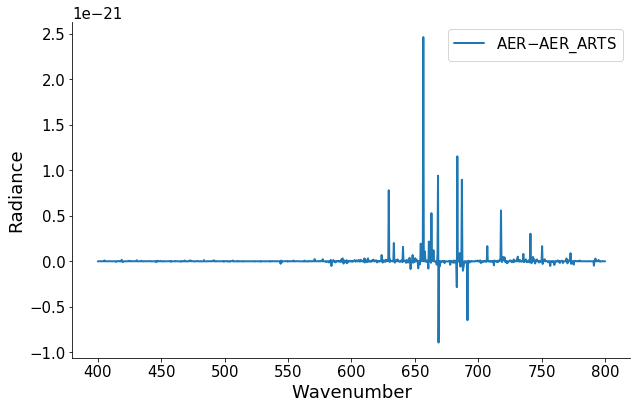

In [13]:
plt.plot(f/3e10, y_nolm_aer - y_nolm_aer_arts, label='AER$-$AER_ARTS')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

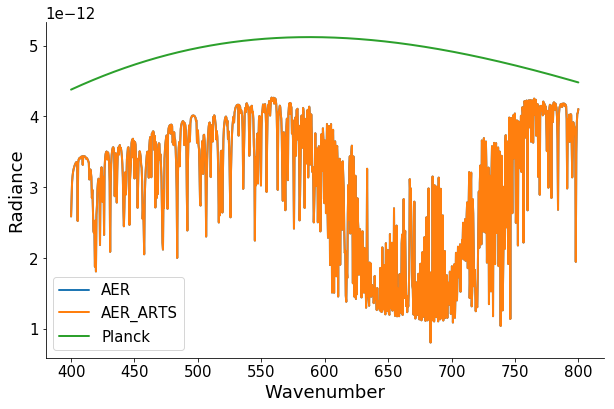

In [14]:
plt.plot(f/3e10, y_nolm_aer, label='AER')
plt.plot(f/3e10, y_nolm_aer_arts, label='AER_ARTS')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

AER 3.2 vs. HITRAN
--

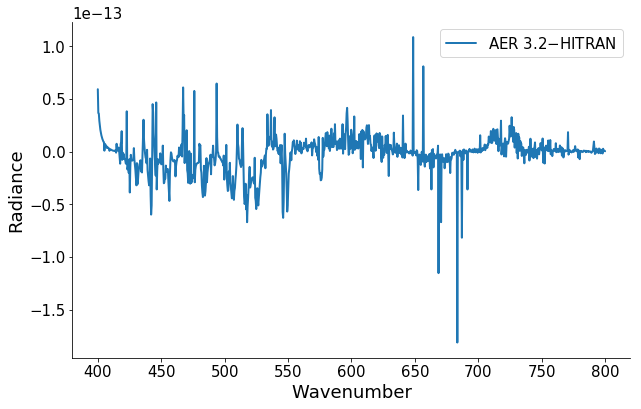

In [15]:
plt.plot(f/3e10, y_nolm_aer - y_nolm_hitran, label='AER 3.2$-$HITRAN')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

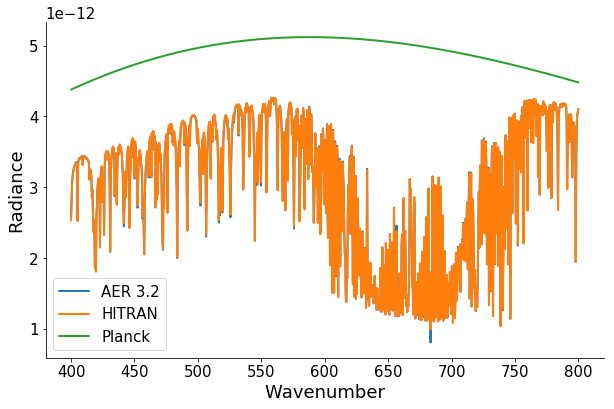

In [16]:
plt.plot(f/3e10, y_nolm_aer, label='AER 3.2')
plt.plot(f/3e10, y_nolm_hitran, label='HITRAN')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

AER 3.6 vs. HITRAN
--

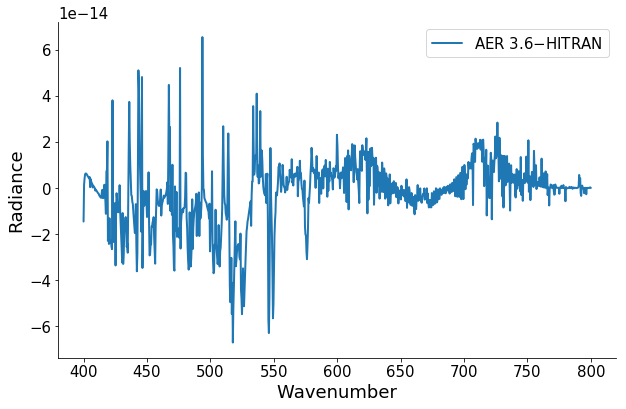

In [17]:
plt.plot(f/3e10, y_nolm_aer_36 - y_nolm_hitran, label='AER 3.6$-$HITRAN')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

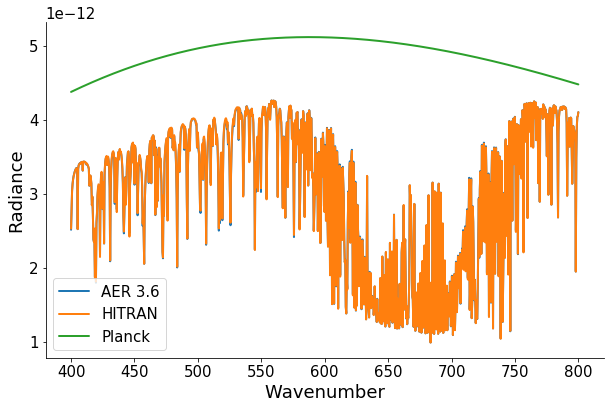

In [18]:
plt.plot(f/3e10, y_nolm_aer_36, label='AER 3.6')
plt.plot(f/3e10, y_nolm_hitran, label='HITRAN')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

No LineMixing vs. LineMixing
--

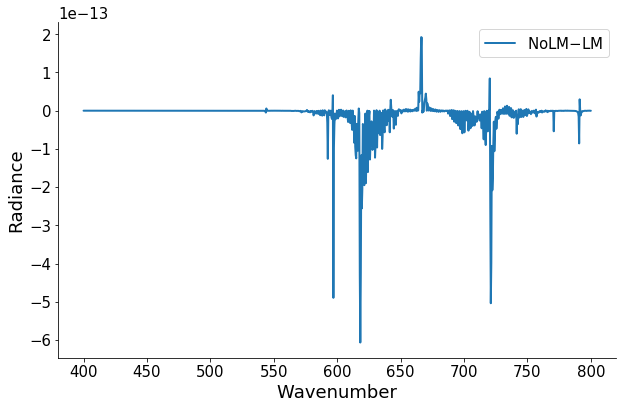

In [19]:
plt.plot(f/3e10, y_nolm_aer_arts - y_lm, label='NoLM$-$LM')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

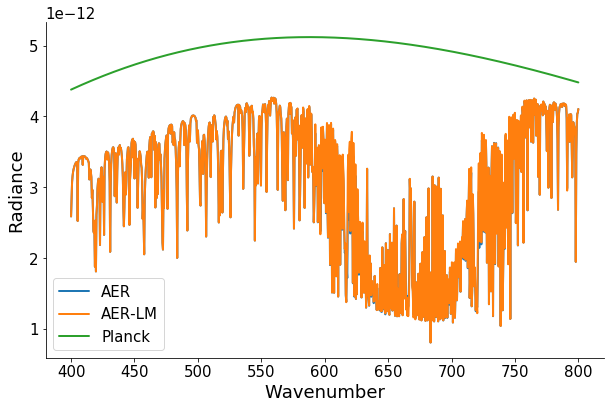

In [20]:
plt.plot(f/3e10, y_nolm_aer, label='AER')
plt.plot(f/3e10, y_lm, label='AER-LM')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

LineMixing 3.2 vs. LineMixing 3.6
--

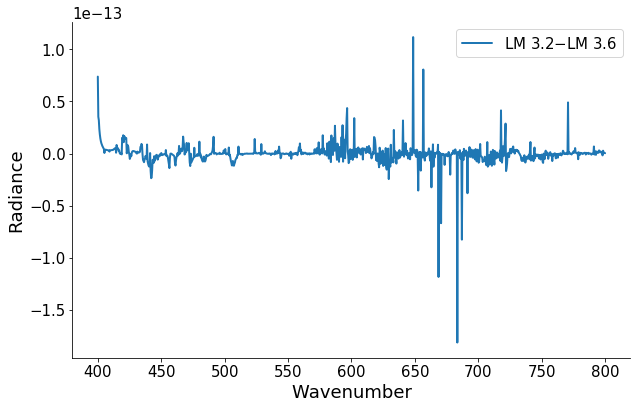

In [21]:
plt.plot(f/3e10, y_lm - y_lm_36, label='LM 3.2$-$LM 3.6')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()

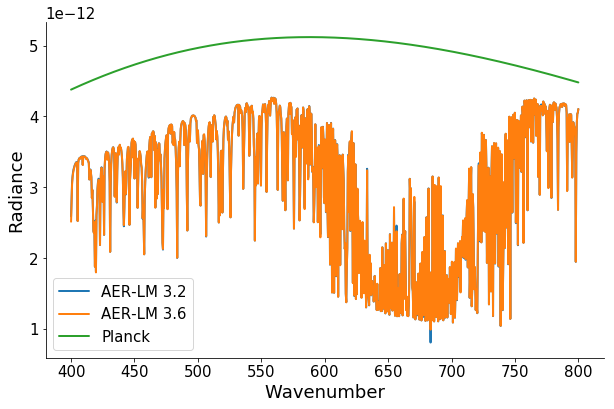

In [22]:
plt.plot(f/3e10, y_lm, label='AER-LM 3.2')
plt.plot(f/3e10, y_lm_36, label='AER-LM 3.6')
plt.plot(f/3e10, ty.physics.planck(f, 300), label='Planck')
plt.ylabel('Radiance')
plt.xlabel('Wavenumber')
l = plt.legend()